In [1]:
import re
import pandas as pd
import numpy as np

## Ekkolodd data processing

In [3]:
# Set column names
ekko_col_names = ['data', 'sample start time']
ekkolodd_df = pd.read_csv('raw/ekkolodd.txt', names=ekko_col_names, header=None)

In [4]:
# Split after confidence
ekkolodd_df['data'] = ekkolodd_df['data'].str.split(r'\%')

In [5]:
# separate to rows
ekkolodd_df = ekkolodd_df.explode('data')

In [6]:
# split distance and confidence
ekkolodd_df['data'] = ekkolodd_df['data'].str.split(r'\t')

In [7]:
# drop all data values that are not distance:xx, confidence:xx
ekkolodd_df = ekkolodd_df[ekkolodd_df.apply(lambda x: True if len(x.data) == 2 else False, axis=1)]

In [8]:
# split distance and confidence to columns
ekkolodd_df['distance'], ekkolodd_df['confidence'] = zip(*ekkolodd_df['data'])

In [9]:
# only keep the integer and set the column type
ekkolodd_df['confidence'] = ekkolodd_df['confidence'].str.replace(r'[^0-9]', '').astype(int)
ekkolodd_df['distance'] = ekkolodd_df['distance'].str.replace(r'[^0-9]', '').astype(int)

C:\Users\Ferdi\AppData\Local\Temp\ipykernel_23408\4058848018.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ekkolodd_df['confidence'] = ekkolodd_df['confidence'].str.replace(r'[^0-9]', '').astype(int)
C:\Users\Ferdi\AppData\Local\Temp\ipykernel_23408\4058848018.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ekkolodd_df['distance'] = ekkolodd_df['distance'].str.replace(r'[^0-9]', '').astype(int)


In [10]:
# remove the data column as we now have two new columns
ekkolodd_df.drop(['data'], axis=1, inplace=True)

In [11]:
# paste the latest sample time value to the NaN cells
ekkolodd_df['sample start time'] = ekkolodd_df['sample start time'].fillna(ekkolodd_df['sample start time'].dropna().iloc[-1])

In [11]:
# save to csv file
ekkolodd_df.to_csv('data/ekkolodd.csv', index=False)

In [19]:
small_ekkolodd_df = ekkolodd_df.loc[ekkolodd_df['sample start time'] == ' 09 Aug 2022 13:37:37 +0000 ']

In [20]:
small_ekkolodd_df = small_ekkolodd_df.reset_index(drop=True)

<AxesSubplot: >

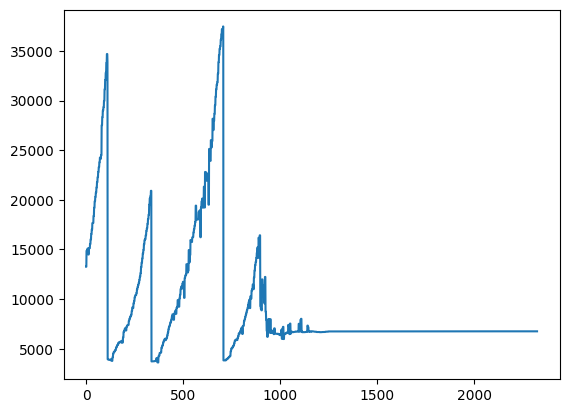

In [22]:
small_ekkolodd_df['distance'].plot()

In [ ]:
# Possibility to cut based on confidence etc.

## Gyroscope data processing

In [3]:
with open('raw/gyroskop.txt') as f:
    gyroskop_raw = f.read().splitlines()

gyroskop = []
for line in gyroskop_raw:
    gyroskop.append(re.split('\), \(', line))

gyroskop

[['[]'],
 ['[]'],
 ['[]'],
 ['[]'],
 ['[]'],
 ['[]'],
 ["[('$ISDPT,0000.000,M,000.0000,B', '0', '0'",
  "'$ISDPT,-000.264,M,000.9906,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9962,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9962,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,00

In [11]:
long_gyroscope = []
for row in gyroskop:
    for val in row:
        if len(val) > 25:
            dat = re.split(',', re.sub(r'\(','',val))
            for v in dat:
                number_dat = re.sub(r'[^0-9]','', v)
                long_gyroscope.append(number_dat)
print(long_gyroscope[:10])


['', '0000000', '', '0000000', '', '0', '0', '', '000264', '']


In [13]:
# Remove empty values
while("" in long_gyroscope):
    long_gyroscope.remove("")
print(long_gyroscope[:10])

['0000000', '0000000', '0', '0', '000264', '0009906', '0', '0', '000208', '0009963']


In [24]:
# Reshape
np_gyroscope = np.array(long_gyroscope)
np_gyroscope = np.reshape(np_gyroscope, (int(np_gyroscope.shape[0]/4), 4))

In [25]:
np_gyroscope

array([['0000000', '0000000', '0', '0'],
       ['000264', '0009906', '0', '0'],
       ['000208', '0009963', '0', '0'],
       ...,
       ['000217', '0009954', '0', '0'],
       ['000217', '0009954', '0', '0'],
       ['000217', '0009954', '0', '0']], dtype='<U7')

In [40]:
gyroskop_df = pd.DataFrame(np_gyroscope)

## Trykksensor data processing

In [38]:
with open('raw/trykksensor.txt') as f:
    trykksensor_raw = f.read().splitlines()

trykksensor = []
for line in trykksensor_raw:
    trykksensor.append(re.split("\\\\r\\\\n", re.sub("'b'",'',line)))

In [39]:
trykksensor

[['sampling started at :Mon, 25 Oct 2021 15:45:20 +0000 '],
 [" b''sampling started at :Mon, 25 Oct 2021 15:48:05 +0000 "],
 [" b''sampling started at :Mon, 25 Oct 2021 15:50:12 +0000 "],
 [" b''sampling started at :Mon, 25 Oct 2021 15:50:12 +0000 "],
 [" b''sampling started at :Mon, 25 Oct 2021 15:52:27 +0000 "],
 [' sampling started at :Mon, 25 Oct 2021 16:17:15 +0000 '],
 [" b'\\x00\\xff$ISDPT,0000.000,M,000.0000,B,00.00,C*38",
  '$ISHPR,005.2,+08.1,+177.3*6E',
  '$ISDPT,-000.264,M,000.9906,B,106.42,C*12',
  '$ISHPR,304.2,-01.4,+178.9*63',
  '$ISDPT,-000.208,M,000.9963,B,50.39,C*25',
  '$ISHPR,297.6,-02.0,+178.9*6B',
  '$ISDPT,-000.208,M,000.9963,B,31.08,C*20',
  '$ISHPR,296.4,-02.1,+178.9*69',
  '$ISDPT,-000.208,M,000.9963,B,24.38,C*27',
  '$ISHPR,296.1,-02.1,+178.9*6C',
  '$ISDPT,-000.208,M,000.9963,B,22.06,C*2C',
  '$ISHPR,296.0,-02.0,+178.9*6C',
  '$ISDPT,-000.208,M,000.9963,B,21.25,C*2E',
  '$ISHPR,296.0,-01.9,+179.0*6E',
  '$ISDPT,-000.208,M,000.9963,B,20.98,C*29',
  '$ISHPR,2

#### Data Validation on trykksensor based on hex

In [45]:
def check_hex_fileformat(file_list):
    for line in file_list:
        if '\\x' in line:
            return "Wrong file format. File includes hex"
    return "There are no hex values."

In [53]:
# Validation on trykksensor shows that the format is wrong
check_hex_fileformat(trykksensor_raw)

'Wrong file format. File includes hex'

## Data generation

In [198]:
def get_ID123_a(size):
   df = pd.DataFrame()
   depth = np.random.uniform(0, 40, size)
   df['depth'] = depth
   pressure = depth * 9.81 + np.random.normal(0, 2, size)
   df['pressure'] = pressure
   temperature = -np.log(depth+0.1) * 4.5 + 23
   temperature = np.clip(temperature, 2.5, 19)
   temperature += np.random.normal(0, 0.2, size)
   df['temperature'] = temperature

   return df

In [199]:
temp_df = get_ID123_a(1000)
temp_df.to_csv('data/ID123-1000.csv', index=False)

<AxesSubplot: >

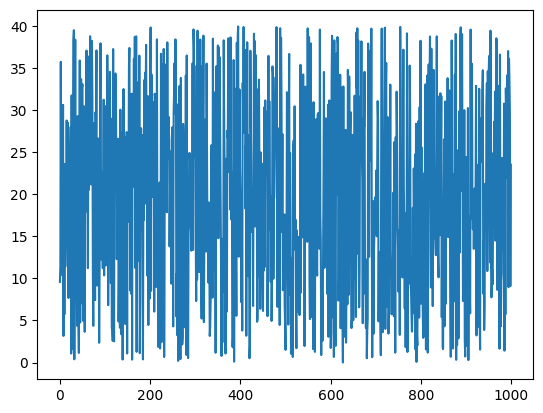

In [204]:
temp_df['depth'].plot()

### Sinus time-based depth 

In [289]:
def get_ID123_b(size=100):
   df = pd.DataFrame()
   sinus = np.sin(np.arange(0,size/5, 0.2)) * 2 + 25
   depth = sinus + np.random.normal(0, 3, size)
   depth += np.random.choice([0, 2, -5], size=size, p=[0.8, 0.15, 0.05])
   depth_day = np.random.randint(0, 100)
   for i in range(size//168 + 1):
      depth[i*168+depth_day:i*168+depth_day+3] -= 22
   # clip to avoid - values
   depth = np.clip(depth, 0, 50)
   df['depth'] = depth
   pressure = depth * 9.81 + np.random.normal(0, 3, size)
   df['pressure'] = pressure
   temperature = -np.log(depth+0.1) * 3.5 + 18
   temperature = np.clip(temperature, 2.5, 15)
   temperature += np.random.normal(0, 0.2, size)
   df['temperature'] = temperature

   return df

<AxesSubplot: >

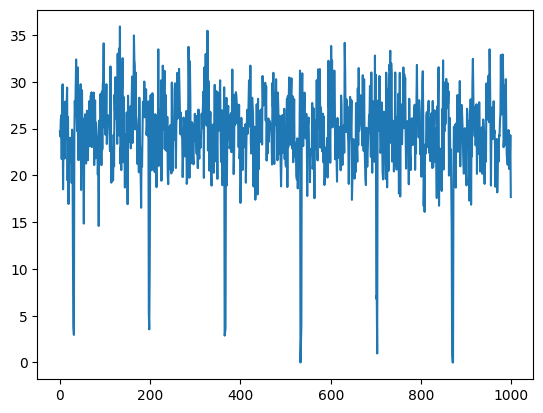

In [332]:
temp_df = get_ID123_b(1000)
temp_df.to_csv('data/ID123-b-1000.csv')
temp_df['depth'].plot()

In [317]:
a = temp_df.sort_values(by = 'depth').reset_index()

<AxesSubplot: >

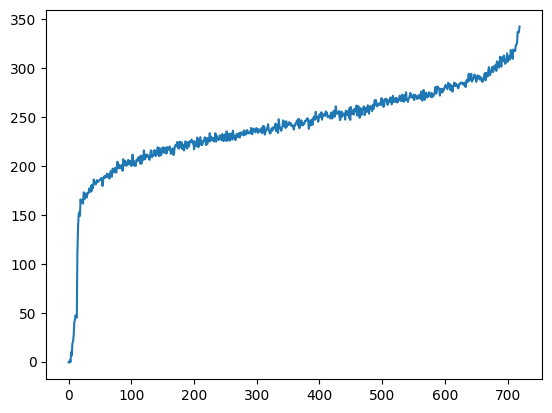

In [331]:
a['pressure'].plot()

### Full data

In [335]:
oilfields = np.array(['Frigg', 'Magnus', 'Troll', 'Gullfaks', 'Viking', 'Snorre'])

In [402]:
def get_ID123_c(field: str, id: int, distribution: int, size=100):
   df = pd.DataFrame()

   # draws distributions
   DEPTH_VAR = 2
   DEPTH_MEAN = 25

   TEMP_LOG_MULT = 3.5
   TEMP_MAX = 16

   OIL_SPILL_MEAN = 0.4
   OIL_SPILL_VAR = 0.3

   OIL_MIN = 0.2
   OIL_MAX = 10

   OIL_SURFACE_CHANCE = 0.1

   time = np.arange(0,size)
   df['time'] = time
   
   field_col = np.array([field]*size)
   df['field'] = field_col

   id_col = np.ones(size) * id
   df['id'] = id_col

   sinus = np.sin(np.arange(0,size/5, 0.2)) * DEPTH_VAR + DEPTH_MEAN
   depth = sinus + np.random.normal(0, 2.5, size)
   depth += np.random.choice([0, 1.5, -4], size=size, p=[0.8, 0.15, 0.05])
   depth_day = np.random.randint(0, 100)
   for i in range(size//168 + 1):
      depth[i*168+depth_day:i*168+depth_day+3] -= 22
   # clip to avoid - values
   depth = np.clip(depth, 0, 50)
   df['depth'] = depth

   pressure = depth * 9.81 + np.random.normal(0, 3, size)
   df['pressure'] = pressure

   temperature = -np.log(depth+0.1) * TEMP_LOG_MULT + TEMP_MAX
   temperature = np.clip(temperature, 2.5, TEMP_MAX)
   temperature += np.random.normal(0, 0.2, size)
   df['temperature'] = temperature

   oil_spill = np.random.normal(OIL_SPILL_MEAN, OIL_SPILL_VAR, size) - np.clip(depth + 10, 0, OIL_MAX)
   oil_spill = np.clip(oil_spill, OIL_MIN, OIL_MAX)
   for i in range(size//168 + 1):
      if np.random.uniform(0,1,1)[0] > OIL_SURFACE_CHANCE:
         oil_spill[i:i+168] = np.clip(oil_spill[i:i+168], 0, 0.5)
   df['oil_spill'] = oil_spill

   return df

### Machine Learning

In [62]:
import sklearn 
from sklearn import linear_model
import plotly.express as px

##### logistic regression Least squares on pressure vs depth

In [55]:
df = pd.read_csv('data/ID123.csv')
df

,time,field,id,depth,pressure,temperature,oil_spill
0,0,Frigg,0.0,24.717020,248.007098,2.451175,0.231921
1,1,Frigg,0.0,24.927733,246.804817,2.540988,0.432560
2,2,Frigg,0.0,24.550513,236.603523,2.577361,0.350754
3,3,Frigg,0.0,26.434499,264.645770,2.510134,0.527473
4,4,Frigg,0.0,24.314268,234.207065,2.442995,0.231921
...,...,...,...,...,...,...,...
27995,995,Snorre,3.0,19.756947,194.876642,8.480161,0.815148
27996,996,Snorre,3.0,18.551077,186.757533,8.874153,0.650881
27997,997,Snorre,3.0,9.788934,98.131514,11.071847,0.959726
27998,998,Snorre,3.0,18.101821,182.797629,8.817031,0.726687


In [64]:
pressure = df['pressure']
depth = df['depth']
x_axis = range(len(pressure))

In [71]:
reg = linear_model.LinearRegression()
reg.fit(list(zip(pressure,x_axis)), depth)

LinearRegression()

In [78]:
px.scatter(x=x_axis, y=reg.predict(list(zip(pressure,x_axis))))